# Librerias

In [2]:
from __future__ import absolute_import, division, print_function #libreria de compatibilidad de Python
import numpy as np 
import pandas as pd 
import tensorflow as tf
import cv2 #formato cv2 de OpenCv
import matplotlib.pyplot as plt 
import seaborn as sns

from PIL import Image#como son imagenes TIFF, esta libreria ayuda mucho

import os #permite usar algunas caracteristicas del Sistema operativo en turno

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

print(os.listdir("C:\\Users\Anaconda\Documents\Spyder Projects\eye_dataset"))#listar todo lo que haya en esa direccion

['APTOS', 'Messidor']


# Carga y preprocesamiento de imagenes

# Procesamiento con  Messidor
   ### Normal 
   son 547 fotos
   ### Abnormal
   son 653 fotos
    

In [8]:
abnormal = os.listdir('C:\\Users\Anaconda\Documents\Spyder Projects\eye_dataset\Messidor\\abnormal') 
normal = os.listdir('C:\\Users\Anaconda\Documents\Spyder Projects\eye_dataset\Messidor\\normal')

Convertimos en arrays ambas variables de entrada

In [9]:
abnormalarray = np.array(abnormal)
print('El tamaño de abnormal en MESSIDOR es: ',abnormalarray.shape)

El tamaño de abnormal en MESSIDOR es:  (653,)


In [10]:
normalarray = np.array(normal)
print('El tamaño de normal en MESSIDOR es: ',normalarray.shape)

El tamaño de normal en MESSIDOR es:  (547,)


Asignacion de etiquetas, reescalado y creacion de listas nuevas con las imagenes modificadas

In [15]:
#ya desde aqui se empeza a trabar mi lap
imagenes = []
ima_n = []
diagnostico = [] #Se crea la lista de etiquetas para clasificar las imagenes

###########################################################
# Asignacion de una etiqueta para las imagenes en Abnormal# 
###########################################################

for i in abnormalarray: #contador en abnormal
    try:
        image = cv2.imread('C:\\Users\Anaconda\Documents\Spyder Projects\eye_dataset\Messidor\\abnormal/' + i)
    ###############################    
    #Platicar con Gener sobre esto#    
    ###############################    
    #volvemos a convertir en imagenes el arreglo, y reescalamos su tamaño de 2240x1488 a 50x50
        image_array = Image.fromarray(image , 'RGB')
        resize_img = image_array.resize((1920, 1080))                           #142 x 148
    
    
    #Agrega a la lista "imagenes" la nueva imagen procesada
        imagenes.append(np.array(resize_img))
    #Agrega a la lista de "diagnostico", la etiqueta "1" que signiica que esta infectada
        diagnostico.append(1)

    except AttributeError:
        print('algo fallo en abnormal')
        
################################################################################    
#Ocurrira lo mismo que el codigo anterior, pero ahora con las imagenes normales#
################################################################################

for u in normalarray: #contador en normal
    try:        
        image1 = cv2.imread('C:\\Users\Anaconda\Documents\Spyder Projects\eye_dataset\Messidor\\normal/' + u)
        image_array1 = Image.fromarray(image1 , 'RGB')
        resize_img1 = image_array1.resize((1920, 1080))
        
     #Agrega a la lista ima la nueva imagen procesada
        ima_n.append(np.array(resize_img1))
    #Agrega a la lista de diagnostico, la etiqueta "0" que signiica que esta sana
        diagnostico.append(0)
        
    except AttributeError:
        print('algo fallo en normal')


In [16]:
#unir las 2 listas de imagenes en 1
imagenes.extend(ima_n)
print("El numero total de imagenes es de 1200")
print("Se supone que tiene que dar el mismo numero: ", len(imagenes))

El numero total de imagenes es de 1200
Se supone que tiene que dar el mismo numero:  1200


Ya concatenadas las listas, procedemos a guardarlas como arrays

In [17]:
################################################################
##NOTA DE TIEMPO: en mi lap, fueron mas de 20 min en ejecucion##
##Principalmente por el size de las imagenes
################################################################
#en la variable "im" guardamos el arreglo con todos los elementos de la lista concatenada "imagenes"
im = np.array(imagenes)
#en la variable "labels" guardamos el arreglo con todos los elementos de la lista "diagnostico"
diag = np.array(diagnostico)

#Guardamos los nuevos arreglos generados.
np.save('Imagenes' , im)
np.save('Etiquetas' , diag)

MemoryError: Unable to allocate 6.95 GiB for an array with shape (1200, 1080, 1920, 3) and data type uint8

In [10]:
print('En Messidor quedo: ','\n')
print('Imagenes de Ojo: {} | Etiquetas: {}'.format(im.shape, diag.shape))

Imagenes de Ojo: (1200, 1080, 1920, 3) | Etiquetas: (1200,)


## APTOS 2019

   ### Normal 
   son 547 fotos
   ### Abnormal
   son 653 fotos

In [ ]:
abnormalap = os.listdir('C:\\Users\Anaconda\Documents\Dataset\eyes\APTOS 2019\_abnormal') 
normalap = os.listdir('C:\\Users\Anaconda\Documents\Dataset\eyes\APTOS 2019\normal')

In [ ]:
abnormalaparray = np.array(abnormalap)
print('El tamaño de abnormal en APTOS es: ',abnormalaparray.shape)

In [ ]:
normalaparray = np.array(normalap)
print('El tamaño de normal en APTOS es: ',normalaparray.shape)

In [ ]:
#ya desde aqui se empeza a trabar mi lap
imagenesAP = []
ima_n1 = []
diagnosticoAP = [] #Se crea la lista de etiquetas para clasificar las imagenes

###########################################################
# Asignacion de una etiqueta para las imagenes en Abnormal# 
###########################################################

for i in abnormalaparray: #contador en abnormal
    try:
        imageAP = cv2.imread('C:\\Users\Anaconda\Documents\Dataset\eyes\APTOS 2019\_abnormal/' + i)
    ###############################    
    #Platicar con Gener sobre esto#    
    ###############################    
    #EN ESTE DATASET, SU TAMAÑO VARIA DEMACIADO, que se puede hacer?, solucion_rapida1: 2240x1488 al igual que messidor
        image_arrayAP = Image.fromarray(imageAP , 'RGB')
        resize_imgAP = image_arrayAP.resize((2240 , 1488))                           #142 x 148
    
    
    #Agrega a la lista "imagenes" la nueva imagen procesada
        imagenesAP.append(np.array(resize_imgAP))
    #Agrega a la lista de "diagnostico", la etiqueta "1" que signiica que esta infectada
        diagnosticoAP.append(1)

    except AttributeError:
        print('algo fallo en abnormal')
        
################################################################################    
#Ocurrira lo mismo que el codigo anterior, pero ahora con las imagenes normales#
################################################################################

for u in normalarray: #contador en normal
    try:        
        imageAP1 = cv2.imread('C:\\Users\Anaconda\Documents\Dataset\eyes\APTOS 2019\_abnormal/' + u)
        image_arrayAP1 = Image.fromarray(imageAP1 , 'RGB')
        resize_imgAP1 = image_arrayAP1.resize((2240, 1488))
        
     #Agrega a la lista ima la nueva imagen procesada
        ima_n1.append(np.array(resize_imgAP1))
    #Agrega a la lista de diagnostico, la etiqueta "0" que signiica que esta sana
        diagnostico.append(0)
        
    except AttributeError:
        print('algo fallo en normal')

In [ ]:
#unir las 2 listas de imagenes en 1
imagenesAP.extend(ima_n1)
print("El numero total de imagenes en APTOS es de 3665")
print("Se supone que tiene que dar el mismo numero: ", len(imagenesAP))

In [ ]:
################################################################
##NOTA DE TIEMPO: en mi lap, fueron mas de 20 min en ejecucion##
##Principalmente por el size de las imagenes
################################################################
#en la variable "im" guardamos el arreglo con todos los elementos de la lista concatenada "imagenes"
imAP = np.array(imagenesAP)
#en la variable "labels" guardamos el arreglo con todos los elementos de la lista "diagnostico"
diagAP = np.array(diagnosticoAP)

#Guardamos los nuevos arreglos generados.
np.save('Imagenes' , imAP)
np.save('Etiquetas' , diagAP)

In [ ]:
print('En APTOS quedo: ','\n')
print('Imagenes de Ojo: {} | Etiquetas: {}'.format(imAP.shape, diagAP.shape))

## Concatenacion de datasets

1200 MESSIDOR

3665 APTOS

#### Ya etiquetadas las imagenes y guardadas en listas, combinaremos las 4 listas resultantes

In [ ]:
#primero las imagenes
ima_completo = []
ima_completo.extend(im, imAP)
#NOTA: DEBE SALIR 4865
print("El numero total de imagenes en ambos dataset es de: ", len(ima_completo))

In [ ]:
#luego las etiquetas
eti_completo = []
diag_completo.extend(diag, diagAP)
#NOTA: DEBE SALIR EL MISMO NUMERO QUE ARRIBA
print("El numero total de etiquetas en ambos dataset es de:", len(ima_completo))

### Visualizacion de datos

Para comprobar

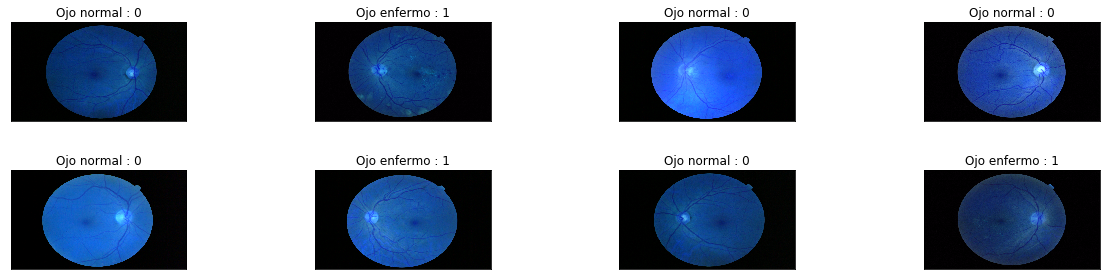

In [20]:
#comprobacion del etiquetado

# Se imprimira una tabla para visualizar los datos
plt.figure(1 , figsize = (20 , 10))
n = 0 #contador de imagenes
for i in range(8):
    n += 1

#regresa integers random de los inputs, con valor minimo 0 y valor maximo 1, forma 0 por defecto
    r = np.random.randint(0 , im.shape[0] , 1)
    
#la tabla se imprimira en un tamaño 7x7 con la cantidad que se le de a N
    plt.subplot(4 , 4 , n)
#el espacio entre cada imagen sera de 0.5 
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
#imprimira una imagen aleatoria del conjunto de celulas
    plt.imshow(im[r[0]])
#imprimira el formato de texto de la tabla dependiendo del valor de la etiqueta
    plt.title('{} : {}'.format('Ojo enfermo' if diag[r[0]] == 1 else 'Ojo normal' , diag[r[0]]) )
#imprimira los valores en el ejex y ejey, pero en este caso no los llenaremos, solo sera para darle forma a la tabla
    plt.xticks([]) , plt.yticks([])
#imprimiremos todo lo anterior    
plt.show()

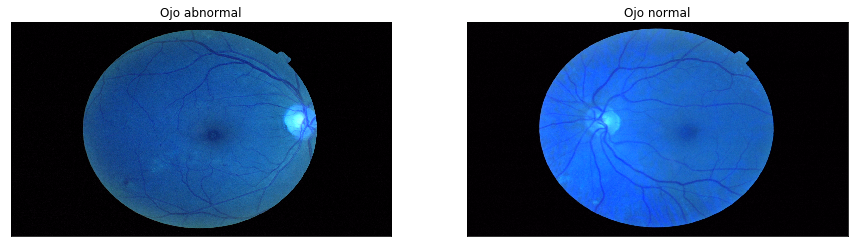

In [19]:
#comprobacion de imagenes, tomando en cuenta el orden en que fueron cargadas:
    #las primeras 653 son abnormal
    #todas las demas seran normal
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(im[0])
plt.title('Ojo abnormal')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(im[1199])
plt.title('Ojo normal')
plt.xticks([]) , plt.yticks([])

plt.show()

### Preparacion del dataset modificado para su ingreso a la CNN 

In [ ]:
#todo el dataset sera ordenado de manera aleatoria
n = np.arange(im.shape[0])
np.random.shuffle(n)#con esto
im = im[n]
diag = diag[n]

In [24]:
#type(im)
type(diag)

numpy.ndarray

In [25]:
#conversion de tipo de dato, esto llevara mucho tiempo:
#nparray a float32, por la cantidad de datos que se generaran
#en diag sera mas sencillo ya que solo se pasaran a enteros
im = im.astype(np.float32)
diag = diag.astype(np.int32)

#recordrar porque
im = im/255

NameError: name 'cells' is not defined

### Separacion en subsets de entrenamiento,validacion y prueba

In [ ]:
from sklearn.model_selection import train_test_split

x,y,train_y,train_x = train_test_split(im , diag , 
                                            test_size = 0.2 ,
                                            random_state = 111)
#random state:
#sin este valor cada ves que se ejecute el programa tendra diferentes datos de entrenamiento
#ya que se generara un valor aleatorio, sacando diferentes valores cada vez

eval_x,eval_y,test_x,test_y = train_test_split(im , diag , 
                                                    test_size = 0.5 , 
                                                    random_state = 111)

In [ ]:
#imprimira las graficas con la cantidad de datos que tenemos en cada subarreglo
#el azul representa la cantidad de datos para testear cada subarreglo y la naranja es la cantidad total de datos
plt.figure(1 , figsize = (15 ,5))
n = 0 
for z , j in zip([train_y , eval_y , test_y] , ['train labels','eval labels','test labels']):
    n += 1
    plt.subplot(1 , 3  , n)
    sns.countplot(x = z )
    plt.title(j)
plt.show()


In [ ]:
#mostrara el shape de los 3 subsets
print('Entrenamiento shape {} ,evaluacion shape {} , prueba shape {}'.format(train_x.shape,
                                                                             eval_x.shape,
                                                                             test_x.shape))

## Modelo de Red neuronal

In [ ]:
tf.reset_default_graph()#vuelve a los valores default

def cnn_model_fn(features , labels , mode):
    input_layers = tf.reshape(features['x'] , [-1 , 1920 , 1080 ,3])    
    conv1 = tf.layers.conv2d(
            inputs = input_layers , 
            filters = 50 , 
            kernel_size = [7 , 7],
            padding = 'same',
            activation = tf.nn.relu
            ) 
    
    
    conv2 = tf.layers.conv2d(
            inputs = conv1, 
            filters = 90,
            kernel_size = [3 , 3],
            padding = 'valid',
            activation = tf.nn.relu
            )

        
    conv3 = tf.layers.conv2d(
        inputs = conv2 ,
        filters = 10,
        kernel_size = [5 , 5],
        padding = 'same', 
        activation = tf.nn.relu
        )
    
    pool1 = tf.layers.max_pooling2d(inputs = conv3 , pool_size = [2 , 2] ,
                                    strides = 2 )
    conv4 = tf.layers.conv2d(
        inputs = pool1 ,
        filters = 5,
        kernel_size = [3 , 3],
        padding = 'same', 
        activation = tf.nn.relu
        )

    pool2 = tf.layers.max_pooling2d(inputs = conv4 , pool_size = [2 , 2] ,
                                    strides = 2 , padding = 'same')
    
    pool2_flatten = tf.layers.flatten(pool2)
    fc1 = tf.layers.dense(
        inputs = pool2_flatten,
        units = 2000,
        activation = tf.nn.relu
        )
    fc2 = tf.layers.dense(
        inputs = fc1,
        units = 1000,
        activation = tf.nn.relu
        )
    fc3 = tf.layers.dense(
        inputs = fc2 , 
        units = 500 ,
        activation = tf.nn.relu
        )
    logits = tf.layers.dense(
        inputs = fc3 ,
        units = 2
        )
    
    predictions = {
        'classes': tf.argmax(input = logits , axis = 1),
        'probabilities': tf.nn.softmax(logits , name = 'softmax_tensor')
    }
    
    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode = mode , 
                                          predictions = predictions)
    
    loss = tf.losses.sparse_softmax_cross_entropy(labels = labels , 
                                                 logits = logits)
    
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
        train_op = optimizer.minimize(loss = loss , 
                                      global_step = tf.train.get_global_step())
        
        return tf.estimator.EstimatorSpec(mode = mode , 
                                            loss = loss , 
                                            train_op = train_op 
                                           )
    eval_metric_op = {'accuracy' : tf.metrics.accuracy(labels = labels ,
                                         predictions =  predictions['classes'])}
    
    return tf.estimator.EstimatorSpec(mode = mode , 
                                      loss = loss , 
                                      eval_metric_ops = eval_metric_op)    

In [ ]:
malaria_detector = tf.estimator.Estimator(model_fn = cnn_model_fn , 
                                         model_dir = 'poner ruta en server')

In [ ]:
tensors_to_log = {'probabilities':'softmax_tensor'}
logging_hook = tf.train.LoggingTensorHook(
    tensors = tensors_to_log , every_n_iter = 50 
    )

 Entrenamiento de la CNN

In [ ]:
#preparence para los problemas
train_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': train_x},
    y = train_y,
    batch_size = 100 , 
    num_epochs = None , 
    shuffle = True
    )
malaria_detector.train(input_fn = train_input_fn , steps = 1 , hooks = [logging_hook])

In [ ]:
#estimar masomenos los steps
malaria_detector.train(input_fn = train_input_fn , steps = 10000)

In [ ]:
#comparacion con los datos de evaluacion
eval_input_fn = tf.estimator.inputs.numpy_input_fn(
    x = {'x': eval_x},
    y = eval_y , 
    num_epochs = 1 , 
    shuffle = False
    )
eval_results = malaria_detector.evaluate(input_fn = eval_input_fn)
print(eval_results)

In [ ]:
#predicciones
pred_input_fn = tf.estimator.inputs.numpy_input_fn(
                                                    x = {'x' : test_x},
                                                    y = test_y,
                                                    num_epochs = 1,
                                                    shuffle = False
                                                    )

y_pred = malaria_detector.predict(input_fn = pred_input_fn)
classes = [p['classes'] for p in y_pred]

## Metricas de Evaluacion

In [ ]:
#matriz de confusion con parametros
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score
print('{} \n{} \n{}'.format(confusion_matrix(test_y , classes) , 
                           classification_report(test_y , classes) , 
                           accuracy_score(test_y , classes)))

In [ ]:
#matriz de confusion
cm=confusion_matrix(y_test,predictions)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TN=cm[0,0]#true negative
TP=cm[1,1]#true positive
FN=cm[1,0]#false negative
FP=cm[0,1]#false ppositive
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

print('The accuracy del modelo = TP+TN/(TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n',
'The Missclassification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n',
'Sensitivity True Positive Rate = TP/(TP+FN) = ',TP/float(TP+FN),'\n',
'Specificity or True Negative Rate = TN/(TN+FP) = ',TN/float(TN+FP),'\n',
'Positive Predictive value = TP/(TP+FP) = ',TP/float(TP+FP),'\n',
'Negative predictive Value = TN/(TN+FN) = ',TN/float(TN+FN),'\n',
'Positive Likelihood Ratio = Sensitivity/(1-Specificity) = ',sensitivity/(1-specificity),'\n',
'Negative likelihood Ratio = (1-Sensitivity)/Specificity = ',(1-sensitivity)/specificity)

In [ ]:
#curva de ROC
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve del modelo de Droop')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)


sklearn.metrics.roc_auc_score(y_test, y_pred_prob_yes[:,1])

## Resultados

In [ ]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , test_x.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(test_x[r[0]])
    plt.title('true {} : pred {}'.format(test_y[r[0]] , classes[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()